In [4]:
import networkx as nx
import random

In [24]:
def generate_graph(num_nodes):
    G = nx.Graph()
    
    G.add_edge(1,2,weight=146)
    G.add_edge(1,3,weight=130)
    G.add_edge(1,4,weight=182)
    G.add_edge(1,5,weight=90)
    G.add_edge(2,3,weight=56)
    G.add_edge(2,4,weight=117)
    G.add_edge(2,5,weight=195)
    G.add_edge(3,4,weight=15)
    G.add_edge(3,5,weight=148)
    G.add_edge(4,5,weight=126)
    
    start_node = random.randint(0, num_nodes-1)
    T = nx.minimum_spanning_tree(nx.complete_graph(num_nodes))
     
    for u, v in T.edges():
        G.add_edge(u, v)
    
    return G

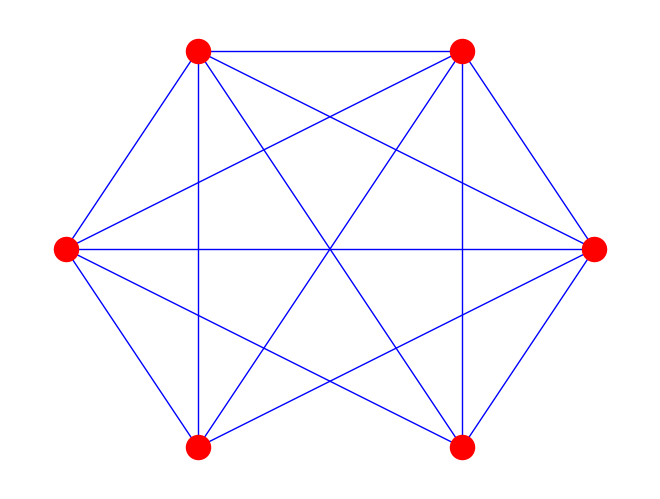

In [25]:
A = generate_graph(5)
nx.draw(A, pos=nx.circular_layout(A), node_color='r',edge_color='b')

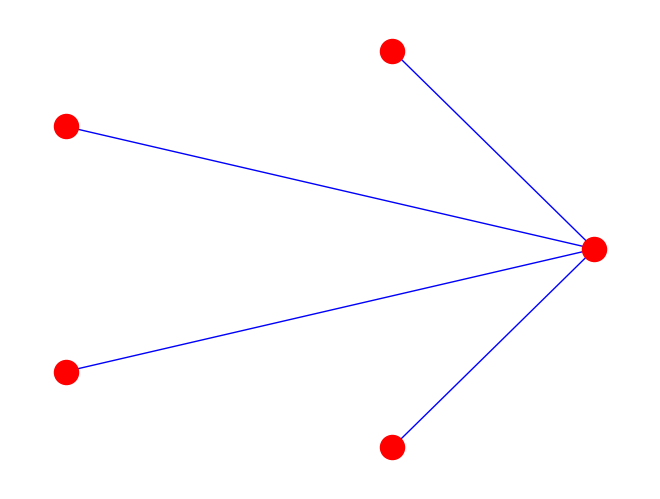

In [57]:
B = nx.Graph()
B.add_node(1)
B.add_node(2)
B.add_node(3)
B.add_node(4)
B.add_node(5)
B.add_edge(1,2,weight=146)
B.add_edge(1,3,weight=130)
B.add_edge(1,4,weight=182)
B.add_edge(1,5,weight=90)
B.add_edge(2,3,weight=56)
B.add_edge(2,4,weight=117)
B.add_edge(2,5,weight=195)
B.add_edge(3,4,weight=15)
B.add_edge(3,5,weight=148)
B.add_edge(4,5,weight=126)
start_node = random.randint(0, 4)
T = nx.minimum_spanning_tree(nx.complete_graph(5))
nx.draw(T, pos=nx.circular_layout(T), node_color='r',edge_color='b')


In [58]:
import random
import numpy as np


In [61]:


# Define the graph parameters
num_nodes = 5
edge_costs = [
    [-1, -146, -130, -182, -90],
    [-146, -1, -56, -117, -195],
    [-130, -56, -1, -15, -148],
    [-182, -117, -15, -1, -126],
    [-90, -195, -148, -126, -1]
]

# Define the genetic algorithm parameters
pop_size = 50
num_generations = 100
mutation_rate = 0.1

# Define the fitness function
def fitness(individual):
    total_cost = 0
    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            if individual[i][j] == 1:
                total_cost += edge_costs[i][j]
    return -total_cost # maximize reliability (minimize negative cost)

# Define the mutation function
def mutate(individual):
    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            if random.random() < mutation_rate:
                individual[i][j] = 1 - individual[i][j] # flip the bit
    return individual

# Define the crossover function
def crossover(parent1, parent2):
    child = []
    for i in range(num_nodes):
        row = []
        for j in range(num_nodes):
            if random.random() < 0.5:
                row.append(parent1[i][j])
            else:
                row.append(parent2[i][j])
        child.append(row)
    return child

# Generate an initial population of random individuals
population = []
for i in range(pop_size):
    individual = []
    for j in range(num_nodes):
        row = []
        for k in range(num_nodes):
            row.append(random.randint(0, 1))
        individual.append(row)
    population.append(individual)

# Evolve the population using a genetic algorithm
for generation in range(num_generations):
    # Evaluate the fitness of each individual in the population
    fitnesses = [fitness(individual) for individual in population]

    # Select the fittest individuals for the next generation
    indices = sorted(range(pop_size), key=lambda i: fitnesses[i], reverse=True)
    population = [population[i] for i in indices[:pop_size//2]]

    # Breed new individuals for the next generation
    for i in range(pop_size//2):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        child = crossover(parent1, parent2)
        child = mutate(child)
        population.append(child)

# Find the fittest individual in the final population
fitnesses = [fitness(individual) for individual in population]
index = max(range(pop_size), key=lambda i: fitnesses[i])
fittest = population[index]

# Print the fittest individual and its fitness
print("Fittest individual:", fittest)
print("Fitness:", fitnesses[index])


Fittest individual: [[0, 1, 1, 1, 1], [0, 1, 1, 1, 1], [0, 0, 0, 1, 1], [0, 0, 0, 1, 1], [1, 0, 1, 0, 1]]
Fitness: 1205
